In [9]:
import numpy as np
import requests
import pandas as pd
import csv
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import folium
import json
import matplotlib as mp
from sklearn.cluster import KMeans

print('Installed')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Installed


In [10]:
pip install BeautifulSoup4


Note: you may need to restart the kernel to use updated packages.


In [11]:
from bs4 import BeautifulSoup
import xml

In [12]:
#define url to webscrape
source = requests.get('https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods').text
soup = BeautifulSoup(source,'html')

#makes it easy to read
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of neighborhoods in Houston - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YD5GOlIRrj-iL7HkDNujiQAAAIc","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighborhoods_in_Houston","wgTitle":"List of neighborhoods in Houston","wgCurRevisionId":1009700318,"wgRevisionId":1009700318,"wgArticleId":5645575,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Articles with short description","Short description with empty Wi

In [13]:
#table generation
table = soup.find('table',{'class':'wikitable'})
table

<table class="wikitable">
<caption>
</caption>
<tbody><tr>
<th>#
</th>
<th>Name
</th>
<th>Location relative to <a href="/wiki/Downtown_Houston" title="Downtown Houston">Downtown Houston</a>
</th>
<th>Approximate boundaries
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Willowbrook,_Houston" title="Willowbrook, Houston">Willowbrook</a>
</td>
<td>Northwest
</td>
<td>Along <a href="/wiki/Texas_State_Highway_249" title="Texas State Highway 249">Texas State Highway 249</a> northwest of Beltway 8
</td></tr>
<tr>
<td>2
</td>
<td><a href="/wiki/Greenspoint,_Houston" title="Greenspoint, Houston">Greater Greenspoint</a>
</td>
<td>North
</td>
<td>Around the junction of Beltway 8 and Interstate 45 North
</td></tr>
<tr>
<td>3
</td>
<td>Carverdale
</td>
<td>Northwest
</td>
<td>South of the junction of Beltway 8 and <a href="/wiki/U.S._Route_290" title="U.S. Route 290">U.S. Route 290</a>
</td></tr>
<tr>
<td>4
</td>
<td><a href="/wiki/Fairbanks,_Houston" title="Fairbanks, Houston">Fairbanks</a> / Nort

In [14]:
#find the table we need
links = table.find_all('td')
links

[<td>1
 </td>,
 <td><a href="/wiki/Willowbrook,_Houston" title="Willowbrook, Houston">Willowbrook</a>
 </td>,
 <td>Northwest
 </td>,
 <td>Along <a href="/wiki/Texas_State_Highway_249" title="Texas State Highway 249">Texas State Highway 249</a> northwest of Beltway 8
 </td>,
 <td>2
 </td>,
 <td><a href="/wiki/Greenspoint,_Houston" title="Greenspoint, Houston">Greater Greenspoint</a>
 </td>,
 <td>North
 </td>,
 <td>Around the junction of Beltway 8 and Interstate 45 North
 </td>,
 <td>3
 </td>,
 <td>Carverdale
 </td>,
 <td>Northwest
 </td>,
 <td>South of the junction of Beltway 8 and <a href="/wiki/U.S._Route_290" title="U.S. Route 290">U.S. Route 290</a>
 </td>,
 <td>4
 </td>,
 <td><a href="/wiki/Fairbanks,_Houston" title="Fairbanks, Houston">Fairbanks</a> / Northwest Crossing
 </td>,
 <td>Northwest
 </td>,
 <td>Along U.S. Route 290 between Interstate 610 and Beltway 8
 </td>,
 <td>5
 </td>,
 <td><a href="/wiki/Inwood_Forest,_Houston" title="Inwood Forest, Houston">Greater Inwood</a>
 </

In [15]:
#create list of what we want from table
Number = []
Name = [] 
Relative = []

In [16]:
#scrapes values of td for only text and assigns them to respective areas
for i in range(0, len(links), 4):
    Number.append(links[i])
    Name.append(links[i+1].find(text=True).rstrip())
    Relative.append(links[i+2].find(text=True).rstrip())

In [17]:
#puts into a data frame
df_Houstonsuper = pd.DataFrame(data=[Number,Name,Relative]).transpose()
df_Houstonsuper.columns =['Number', 'Name','Location Relative to Downtown Houston']

In [18]:
#let see how it looks
df_Houstonsuper.head(60)

,Number,Name,Location Relative to Downtown Houston
0,[1\n],Willowbrook,Northwest
1,[2\n],Greater Greenspoint,North
2,[3\n],Carverdale,Northwest
3,[4\n],Fairbanks,Northwest
4,[5\n],Greater Inwood,Northwest
5,[6\n],Acres Home,Northwest
6,[7\n],Hidden Valley,North
7,[8\n],Westbranch,West
8,[9\n],Addicks / Park Ten,West
9,[10\n],Spring Branch,West


In [19]:
df_Houstonsuper.shape


(88, 3)

In [20]:
pip install geocoder


Note: you may need to restart the kernel to use updated packages.


In [21]:
import geocoder


In [22]:
def get_latlng(name):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Houston, Texas'.format(name))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [23]:
coords = [ get_latlng(name) for name in df_Houstonsuper['Name'].tolist()]


In [24]:
coords

[[29.95240000000007, -95.54462999999998],
 [29.939670000000035, -95.40747999999996],
 [29.849590000000035, -95.54244999999997],
 [29.852730000000065, -95.52418999999998],
 [29.869770000000074, -95.48043999999999],
 [29.87047000000007, -95.43535999999995],
 [29.88847000000004, -95.41459999999995],
 [29.83937000000003, -95.55360999999999],
 [29.814340000000072, -95.61592999999999],
 [29.803512737626196, -95.51587483219035],
 [29.826440000000048, -95.48876999999999],
 [33.217340000000036, -96.62706999999995],
 [29.82797000000005, -95.39369999999997],
 [29.79684000000003, -95.43403999999998],
 [29.796250000000043, -95.39486999999997],
 [29.77263000000005, -95.57091999999994],
 [29.75795000000005, -95.63096999999999],
 [29.74768000000006, -95.57423999999997],
 [29.725484461288932, -95.55103598948064],
 [29.732170000000053, -95.52336999999994],
 [29.760150000000067, -95.47670999999997],
 [29.888899459838154, -95.32449993087188],
 [29.803758799994004, -95.47214984736263],
 [29.76401500000003,

In [25]:
#create temporty data frome
df_coords =pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [26]:
#Merge to old dataframe
df_Houstonsuper['Latitude']=df_coords['Latitude']
df_Houstonsuper['Longitude']=df_coords['Longitude']

In [27]:
#check combined data frame for lat and lng data
df_Houstonsuper

,Number,Name,Location Relative to Downtown Houston,Latitude,Longitude
0,[1\n],Willowbrook,Northwest,29.952400,-95.544630
1,[2\n],Greater Greenspoint,North,29.939670,-95.407480
2,[3\n],Carverdale,Northwest,29.849590,-95.542450
3,[4\n],Fairbanks,Northwest,29.852730,-95.524190
4,[5\n],Greater Inwood,Northwest,29.869770,-95.480440
...,...,...,...,...,...
83,[84\n],Spring Branch,Northwest,29.803513,-95.515875
84,[85\n],Spring Branch Central,Northwest,29.815870,-95.517730
85,[86\n],Spring Branch East,Northwest,29.807620,-95.480110
86,[87\n],Greenway,Southwest,29.690150,-95.283765


In [28]:
#check shape
print(df_Houstonsuper.shape)

(88, 5)


In [29]:
#save as csv file
df_Houstonsuper.to_csv("df_Houstonsuper.csv", index=False)

In [32]:
# define Foursquare Credentials and Version
CLIENT_ID = '2T5KHVU0T1QLUQENHZSX31LJMO5NW2JYNM3X4B4RAS3Q0PAR' # your Foursquare ID
CLIENT_SECRET = 'YVFLSTN1NSLAQON33C0C1FRJMK1V540FPKNXASOM0DLMMP05' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2T5KHVU0T1QLUQENHZSX31LJMO5NW2JYNM3X4B4RAS3Q0PAR
CLIENT_SECRET:YVFLSTN1NSLAQON33C0C1FRJMK1V540FPKNXASOM0DLMMP05


In [33]:
#Category ID corresponding to food and drink shop taken from Foursquare website (https://developer.foursquare.com/docs/resources/categories)

radius = 2000
LIMIT = 100

venues_list = []

for lat,lng, name in zip(df_Houstonsuper['Latitude'],df_Houstonsuper['Longitude'],df_Houstonsuper['Name']):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for v in results:
        venues_list.append((
                name,
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']))

In [34]:
#venue_list to new data frame
df_venues = pd.DataFrame(venues_list)

#column names
df_venues.columns = ['Name', 
                     'Name Latitude', 
                     'Name Longitude', 
                     'Venue Name',
                     'Venue Latitude',
                     'Venue Logitude',
                     'Venue Category']

df_venues.head()

,Name,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
0,Willowbrook,29.9524,-95.54463,Bed Bath & Beyond,29.953517,-95.543865,Furniture / Home Store
1,Willowbrook,29.9524,-95.54463,Babin's Seafood House,29.955088,-95.544452,Seafood Restaurant
2,Willowbrook,29.9524,-95.54463,Costco,29.954658,-95.547697,Warehouse Store
3,Willowbrook,29.9524,-95.54463,Saltgrass Steak House,29.955011,-95.542082,Steakhouse
4,Willowbrook,29.9524,-95.54463,Buffalo Wild Wings,29.954015,-95.541562,Wings Joint


In [35]:
print(df_venues.shape)


(4890, 7)


In [36]:
df_venues.groupby(['Name']).count()


,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
Name,,,,,,
Acres Home,7,7,7,7,7,7
Addicks / Park Ten,5,5,5,5,5,5
Afton Oaks,100,100,100,100,100,100
Alief,60,60,60,60,60,60
Astrodome Area,44,44,44,44,44,44
...,...,...,...,...,...,...
Westbury,31,31,31,31,31,31
Westchase,100,100,100,100,100,100
Westwood,82,82,82,82,82,82


In [37]:
#Average number of venues gathered
df_venues.groupby(['Name']).count().mean()

Name Latitude     56.206897
Name Longitude    56.206897
Venue Name        56.206897
Venue Latitude    56.206897
Venue Logitude    56.206897
Venue Category    56.206897
dtype: float64

In [38]:
print('There are {} unique categories'.format(len(df_venues['Venue Category'].unique())))


There are 325 unique categories


In [39]:
#print out list of venue categories
df_venues['Venue Category'].unique()[:50]

array(['Furniture / Home Store', 'Seafood Restaurant', 'Warehouse Store',
       'Steakhouse', 'Wings Joint', 'Vietnamese Restaurant', 'Kids Store',
       'Sporting Goods Shop', 'Thai Restaurant',
       'Health & Beauty Service', 'Hotel', 'Toy / Game Store',
       'Latin American Restaurant', 'Coffee Shop', 'Movie Theater',
       'Brewery', 'Department Store', 'Chinese Restaurant',
       'Cajun / Creole Restaurant', 'Fried Chicken Joint',
       'Discount Store', 'Mexican Restaurant', 'Lingerie Store',
       'Burger Joint', 'Fast Food Restaurant', 'Wine Shop', 'Gym',
       'Electronics Store', 'Sports Bar', 'Gym / Fitness Center', 'Bar',
       'Clothing Store', 'Cosmetics Shop', 'Mobile Phone Shop',
       'Deli / Bodega', 'Italian Restaurant', 'Pet Store',
       'Supplement Shop', 'Grocery Store', 'Chocolate Shop', 'Taco Place',
       'Arts & Crafts Store', 'Japanese Restaurant', 'Accessories Store',
       'Jewelry Store', 'Juice Bar', 'Shoe Store', 'Hot Dog Joint',
       

In [40]:
Houston_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix = "", prefix_sep = "")

#add Name column back to dataframe
Houston_onehot['Name'] = df_venues['Name']

#move Name to first column
fixed_columns = [Houston_onehot.columns[-1]] + list(Houston_onehot.columns[:-1])
Houston_onehot = Houston_onehot[fixed_columns]

Houston_onehot.head()

,Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Warehouse,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
Houston_grouped = Houston_onehot.groupby('Name').mean().reset_index()
Houston_grouped

,Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Warehouse,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Acres Home,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
1,Addicks / Park Ten,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
2,Afton Oaks,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.0,0.00,0.030000,0.00,0.0,0.0,0.0
3,Alief,0.0,0.016667,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
4,Astrodome Area,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.022727,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Westbury,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
83,Westchase,0.0,0.010000,0.0,0.010000,0.0,0.0,0.0,0.0,0.010000,...,0.0,0.00,0.0,0.0,0.00,0.010000,0.00,0.0,0.0,0.0
84,Westwood,0.0,0.000000,0.0,0.012195,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.0,0.00,0.012195,0.00,0.0,0.0,0.0
85,Willow Meadows,0.0,0.000000,0.0,0.018182,0.0,0.0,0.0,0.0,0.018182,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0


In [42]:
print(Houston_grouped.shape)


(87, 326)


In [43]:
#number of grocery stores
len(Houston_grouped[Houston_grouped["Grocery Store"] > 0])

48

In [44]:
Houston_grocery = Houston_grouped[['Name','Grocery Store']]


In [45]:
Houston_grocery.head(60)


,Name,Grocery Store
0,Acres Home,0.142857
1,Addicks / Park Ten,0.000000
2,Afton Oaks,0.000000
3,Alief,0.016667
4,Astrodome Area,0.022727
5,Braeburn,0.036364
6,Braeswood,0.022222
7,Brays Oaks,0.076923
8,Briar Forest,0.050000
9,Carverdale,0.000000


In [46]:
from sklearn.cluster import KMeans


In [47]:
#set number of clusters
kclusters = 4

Houston_grocery_clustering = Houston_grocery.drop(['Name'],1)

#run k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Houston_grocery_clustering)

#check cluster labels
kmeans.labels_[0:10]

array([1, 3, 3, 0, 0, 0, 0, 1, 0, 3], dtype=int32)

In [48]:
#create new data frame that includes cluster
Houston_merged = Houston_grocery.copy()

#add clustering label
Houston_merged['Cluster Labels'] = kmeans.labels_

In [49]:
Houston_merged.head()


,Name,Grocery Store,Cluster Labels
0,Acres Home,0.142857,1
1,Addicks / Park Ten,0.000000,3
2,Afton Oaks,0.000000,3
3,Alief,0.016667,0
4,Astrodome Area,0.022727,0


In [50]:
Houston_merged = Houston_merged.join(df_Houstonsuper.set_index('Name'), on='Name')

Houston_merged.head()

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
0,Acres Home,0.142857,1,[6\n],Northwest,29.870470,-95.43536
1,Addicks / Park Ten,0.000000,3,[9\n],West,29.814340,-95.61593
2,Afton Oaks,0.000000,3,[23\n],West,29.803759,-95.47215
3,Alief,0.016667,0,[25\n],Southwest,29.710880,-95.59569
4,Astrodome Area,0.022727,0,[34\n],South,29.691500,-95.38869


In [51]:
print(Houston_merged.shape)


(88, 7)


In [52]:
#sort by cluster label
Houston_merged.sort_values(['Cluster Labels'], inplace = True)
Houston_merged

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
55,Meyerland,0.030000,0,[31\n],Southwest,29.684530,-95.467460
34,Greater Uptown,0.024390,0,[21\n],West,29.760150,-95.476710
36,Gulfgate Riverview /,0.016667,0,[69\n],Southeast,29.699296,-95.295574
53,Medical Center,0.020000,0,[33\n],South,29.711790,-95.393150
71,South Belt / Ellington,0.030303,0,[80\n],Southeast,29.608150,-95.218430
...,...,...,...,...,...,...,...
48,Lawndale / Wayside,0.013699,3,[88\n],Southeast,29.722700,-95.305940
49,Lazybrook / Timbergrove,0.000000,3,[14\n],Northwest,29.796840,-95.434040
50,MacGregor,0.000000,3,[83\n],Southeast,29.711500,-95.356030
54,Memorial,0.000000,3,[16\n],West,29.772630,-95.570920


In [54]:
#cluster 0
Houston_merged.loc[Houston_merged['Cluster Labels'] == 0]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
55,Meyerland,0.030000,0,[31\n],Southwest,29.684530,-95.467460
34,Greater Uptown,0.024390,0,[21\n],West,29.760150,-95.476710
36,Gulfgate Riverview /,0.016667,0,[69\n],Southeast,29.699296,-95.295574
53,Medical Center,0.020000,0,[33\n],South,29.711790,-95.393150
71,South Belt / Ellington,0.030303,0,[80\n],Southeast,29.608150,-95.218430
37,Gulfton,0.030000,0,[27\n],Southwest,29.711870,-95.482600
38,Harrisburg,0.027027,0,[65\n],Southeast,29.718150,-95.278820
22,Fondren Gardens,0.027778,0,[39\n],Southwest,29.625380,-95.500710
74,Spring Branch,0.020408,0,[10\n],West,29.803513,-95.515875
74,Spring Branch,0.020408,0,[84\n],Northwest,29.803513,-95.515875


In [55]:
#cluster 1
Houston_merged.loc[Houston_merged['Cluster Labels']==1]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
39,Hidden Valley,0.085714,1,[7\n],North,29.88847,-95.41460
0,Acres Home,0.142857,1,[6\n],Northwest,29.87047,-95.43536
30,Greater Hobby Area,0.064516,1,[78\n],Southeast,29.62949,-95.27848
7,Brays Oaks,0.076923,1,[36\n],Southwest,29.65732,-95.51693
82,Westbury,0.064516,1,[37\n],Southwest,29.65596,-95.48209
78,Trinity / Houston Gardens,0.066667,1,[48\n],Northeast,29.82594,-95.30836
31,Greater Inwood,0.085714,1,[5\n],Northwest,29.86977,-95.48044
16,East Houston,0.125000,1,[49\n],Northeast,29.84476,-95.25586
23,Fort Bend / Houston,0.117647,1,[41\n],Southwest,29.59470,-95.48603


In [56]:
#cluster 2
Houston_merged.loc[Houston_merged['Cluster Labels']==2]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
70,South Acres / Crestmont Park,0.230769,2,[76\n],South,29.6311,-95.35415


In [57]:
#cluster 3
Houston_merged.loc[Houston_merged['Cluster Labels']==3]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
76,Spring Branch East,0.010989,3,[86\n],Northwest,29.807620,-95.480110
73,South Park,0.000000,3,[72\n],South,29.667050,-95.328690
72,South Main,0.000000,3,[35\n],South,29.671020,-95.411950
69,Sharpstown,0.000000,3,[26\n],Southwest,29.701450,-95.518220
79,University Place,0.000000,3,[28\n],Southwest,29.719490,-95.406430
81,Westbranch,0.000000,3,[8\n],West,29.839370,-95.553610
66,Pleasantville,0.000000,3,[57\n],East,29.766787,-95.276020
68,Settegast,0.000000,3,[50\n],Northeast,29.818650,-95.277380
58,Minnetex,0.000000,3,[77\n],South,29.620920,-95.323000
57,Midtown,0.010000,3,[62\n],South,29.741550,-95.376870


In [58]:
import seaborn as sns


<AxesSubplot:xlabel='Cluster Labels', ylabel='Grocery Store'>

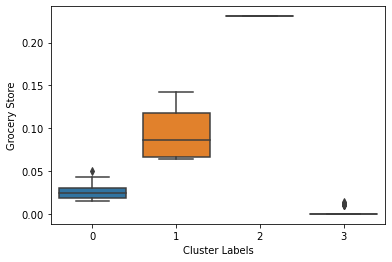

In [59]:
sns.boxplot(Houston_merged['Cluster Labels'], Houston_merged['Grocery Store'])


<AxesSubplot:xlabel='Location Relative to Downtown Houston', ylabel='Grocery Store'>

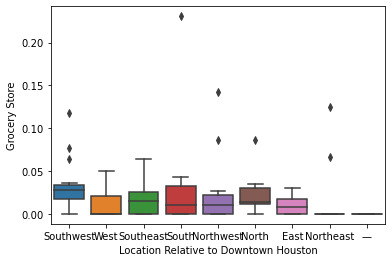

In [60]:
sns.boxplot(Houston_merged['Location Relative to Downtown Houston'], Houston_merged['Grocery Store'])


In [61]:
Houston_merged.describe()


,Grocery Store,Cluster Labels,Latitude,Longitude
count,88.000000,88.000000,88.000000,88.000000
mean,0.022338,1.727273,29.796567,-95.407064
std,0.036745,1.411995,0.380435,0.177444
min,0.000000,0.000000,29.579670,-96.627070
25%,0.000000,0.000000,29.694315,-95.491755
50%,0.011835,3.000000,29.744615,-95.386625
75%,0.027215,3.000000,29.814723,-95.304025
max,0.230769,3.000000,33.217340,-95.110510
